In [66]:
## import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

colors = [
    '#222222', '#375E97', '#FB6542', '#3F681C','#FFBB00', 
    '#B7B8B6', '#4CB5F5', '#B3C100', '#34675C',
    'red', 'green', 'blue', 'olive', 'purple', 'cyan', 'grey', 'pink', 'brown'
]
markers = ['+', 'x', 'o', '^', 's', 'p', '*', '1', '2', '4', '<', '>']

def get_f_vals(f_log):
    f = open(f_log)
    return f.readline().split(',')[:-1]

def F1(data):
    F1s = []
    batches = []
    batch = 1

    for val in data:
        F1s.append(val)
        batches.append(batch)
        batch *= 2
        
    return F1s, batches

def get_graph_data(target):    
    targets = []
    for r in [10, 20, 30, 40, 50]:
        targets.append(target.replace('*', str(r)))
        
    fbs = []
    for target in targets:
        fbs.append(F1(get_f_vals('./results_collection_sem_eval_COMPLETE/' + target + '/F_vals')))    
        # './results_collection_sem_eval_COMPLETE/'
    
    tmp = np.zeros((5, len(fbs[0][0])), dtype='float32')
    for j, fb in enumerate(fbs):
        tmp[j, :] = fb[0]
        
    return [fbs[0][1], np.average(tmp, axis=0), np.std(tmp, axis=0)]

labels = ['SEQ2SEQ', 'SDP', 'CW', 'CW_ATT']
def show_plots(targets):
    plt.clf()
    
    fig = plt.figure(dpi=300)
    ax = fig.gca()
#     ax.grid(color='r', linestyle='-.', linewidth=2)
    ax.set_xticks([1, 2, 4, 8])
    ax.set_yticks(np.arange(0.2, 1.2, 0.1))

    plt.xscale('log', basex=2)
    plt.errorbar(*get_graph_data('none_r_*'),
                     lw=1, color=colors[0], marker=markers[0], markersize=4, label='NONE')
    
    for i, target in enumerate(targets):
        plt.errorbar(*get_graph_data(target),
                     lw=1, color=colors[i+1], marker=markers[i+1], markersize=4, label=labels[i])#targets[i])
        
#         for i, (f, b) in enumerate(get_graph_data(targets)):
#             plt.plot(b, f, lw=1, color=colors[i+1], marker=markers[i+1], markersize=4, label=targets[i])
        
    plt.xlabel('batches')
    plt.ylabel('MacroF1')
    plt.ylim([0.2, 1.0])
    plt.xlim([0, 140])
    plt.title('F1-instance batches graph')
    plt.grid(color='grey', lw=0.5, linestyle='dotted')
    plt.legend(loc="lower right")

#     fig, ax = plt.subplots()
#     ax.plot([1, 2, 4, 8, 16, 32, 64, 128, 256], [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
#     ax.grid(True)
#     ax.grid(color='r', linestyle='-', linewidth=2)


    plt.show()

r = 50
targets = [
    'seq2seq_r_*_opt_adagrad_lr_0001_m_0',
    'depsp_r_*_opt_adagrad_lr_001_m_0',
    'skipgram_r_*_opt_adagrad_lr_001_m_0_c_2',
#     'skipgram_r_*_opt_adagrad_lr_001_m_2_c_2',
#     'skipgram_r_*_opt_adagrad_lr_001_m_1_c_2',

#     'skipgram_r_*_opt_adagrad_lr_01_m_4_c_2',
#     'skipgram_r_*_opt_adagrad_lr_01_m_3_c_2',
#     'skipgram_r_*_opt_adadelta_lr_10_m_1_c_2',
#     'skipgram_r_*_opt_adadelta_lr_10_m_2_c_2',
#     'skipgram_r_*_opt_adadelta_lr_10_m_0_c_2',
#     'skipgram_r_*_opt_adagrad_lr_001_m_0_c_2',
#     'depsp_r_*_opt_adagrad_lr_005_m_0'
#     'depsp_r_*_opt_adagrad_lr_01_m_1',
#     'depsp_r_*_opt_adagrad_lr_005_m_0',
#     'seq2seq_r_*_opt_adagrad_lr_005_m_0',
#     'skipgram_r_10_opt_adagrad_lr_005_m_1_c_2'
#     'seq2seq_r_*_opt_adadelta_lr_00001_m_0',
#     'depsp_adagrad_lr_005_mode_0_l2_6',              # 171023
#     'skipgram_adagrad_lr_005_mode_0_l2_6_neg_10_win_2',  # 171019
#     'skipgram_adagrad_lr_005_mode_1_l2_6_neg_10_win_2',
]


show_plots(targets)



ValueError: Unrecognized marker style --+

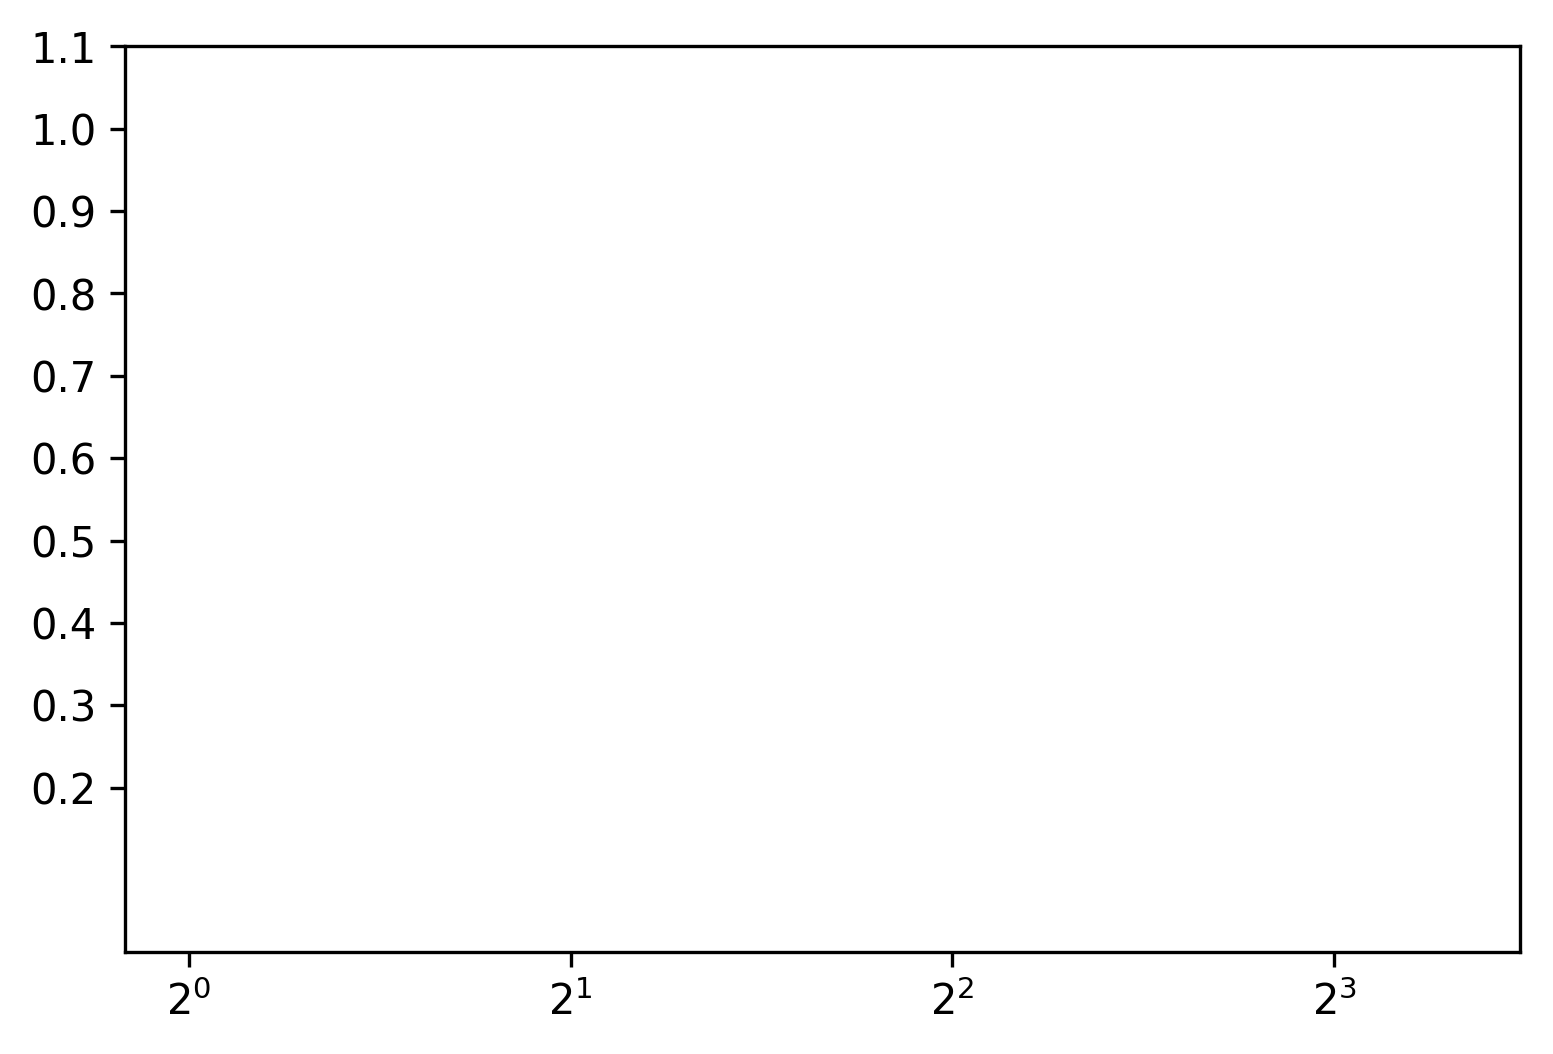

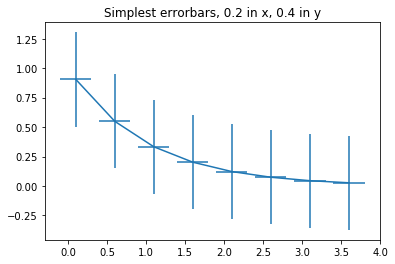

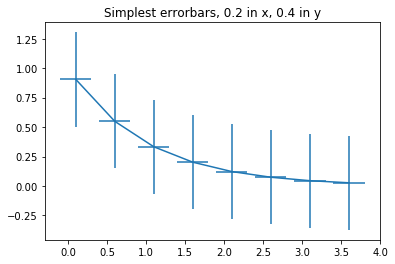

In [68]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")
plt.show()



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2557 samples in 0.015s...
[t-SNE] Computed neighbors for 2557 samples in 2.233s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2557
[t-SNE] Computed conditional probabilities for sample 2000 / 2557
[t-SNE] Computed conditional probabilities for sample 2557 / 2557
[t-SNE] Mean sigma: 3.224578
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.142670
[t-SNE] Error after 350 iterations: 1.916751


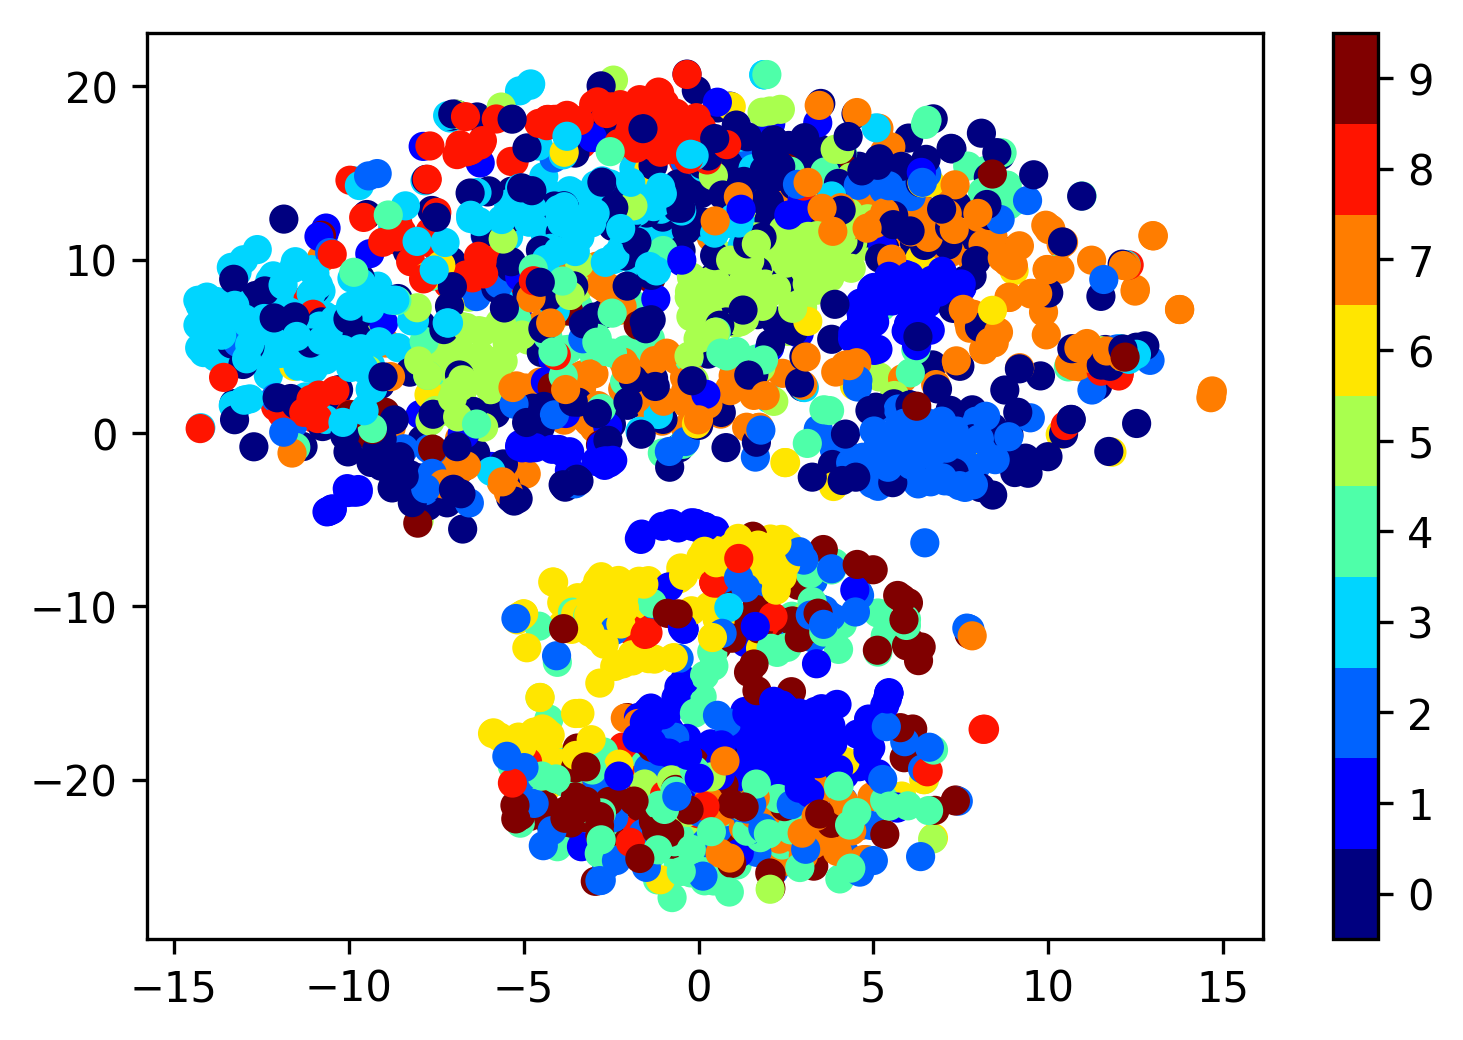

In [15]:
import time

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np

f = open('results_sem_eval/skipgram_r_10_opt_adadelta_lr_10_m_0_c_2/batches_2/sent_embeddings_aft')
lines = f.readlines()
embeddings = list(map(lambda emb: list(map(lambda val: float(val), 
                                           emb.strip().split('\t')[1].split(' '))), lines))
embeddings = np.asarray(embeddings, dtype='float32')
    
labels = list(map(lambda emb: float(emb.strip().split('\t')[0]), lines))
labels = np.asarray(labels, dtype='float32')

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=350)
new_embeddings = tsne.fit_transform(embeddings)

vis_x = new_embeddings[:, 0]
vis_y = new_embeddings[:, 1]

plt.figure(dpi=300)
plt.scatter(vis_x, vis_y, c=labels, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [137]:
## import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

colors = [
    '#222222', '#375E97', '#FB6542', '#3F681C','#FFBB00', 
    '#B7B8B6', '#4CB5F5', '#B3C100', '#34675C',
    'red', 'green', 'blue', 'olive', 'purple', 'cyan', 'grey', 'pink', 'brown'
]
markers = ['+', 'x', 'o', '^', 's', 'p', '*', '1', '2', '4', '<', '>']

def get_f_vals(f_log):
    f = open(f_log)
    return f.readline().split(',')[:-1]

def F1(data):
    F1s = []
    batches = []
    batch = 1
    
    for val in data:
        F1s.append(val)
        batches.append(batch)
        batch *= 2
        
    return F1s, batches

def get_graph_data(targets):
    res = []
    for target in targets:
        res.append(F1(get_f_vals('./results_sem_/' + target + '/F_vals')))
    return res

labels = ['SEQ2SEQ', 'SDP', 'CW', 'CW_ATT']
def show_plots(targets):
    plt.clf()
    
    f00, b00 = get_graph_data(['../results_collection/none_r_10'])[0]
    fig = plt.figure(dpi=300)
    ax = fig.gca()
#     ax.grid(color='r', linestyle='-.', linewidth=2)
    ax.set_xticks([1, 2, 4, 8])
    ax.set_yticks(np.arange(0.2, 0.9, 0.1))

    plt.xscale('log', basex=2)
    plt.plot(b00, f00, lw=1, color=colors[0], marker='+', label='NONE')
    
    for i, target in enumerate(targets):
        same_targets = []
        for r in [10, 20, 30, 40]:
            same_targets.append(target.replace('*', str(r)))
        fbs = get_graph_data(same_targets)
        tmp = np.zeros((4, len(fbs[0][0])), dtype='float32')
        for j, fb in enumerate(fbs):
            tmp[j, :] = fb[0]
        plt.errorbar(fbs[0][1], np.average(tmp, axis=0), np.std(tmp, axis=0),
                     lw=1, color=colors[i+1], marker=markers[i+1], markersize=4, label=targets[i])
        
#         for i, (f, b) in enumerate(get_graph_data(targets)):
#             plt.plot(b, f, lw=1, color=colors[i+1], marker=markers[i+1], markersize=4, label=targets[i])
        
    plt.xlabel('batches')
    plt.ylabel('MacroF1')
    plt.ylim([0.2, 0.9])
    plt.xlim([0, 160])
    plt.title('F1-instance batches graph')
    plt.grid(color='grey', lw=0.5, linestyle='dotted')
    plt.legend(loc="lower right")
    
#     fig, ax = plt.subplots()
#     ax.plot([1, 2, 4, 8, 16, 32, 64, 128, 256], [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
#     ax.grid(True)
#     ax.grid(color='r', linestyle='-', linewidth=2)


    plt.show()

r = 50
targets = [ 
    'skipgram_r_10_opt_adadelta_lr_10_m_0_c_2',
    
#     'depsp_r_*_opt_adagrad_lr_01_m_0',
    
#     'skipgram_r_10_opt_adagrad_lr_005_m_1_c_2'
#     'seq2seq_adadelta_lr_000001_l2_6',
#     'depsp_adagrad_lr_005_mode_0_l2_6',              # 171023
#     'skipgram_adagrad_lr_005_mode_0_l2_6_neg_10_win_2',  # 171019
#     'skipgram_adagrad_lr_005_mode_1_l2_6_neg_10_win_2',
]

show_plots(targets)



IOError: [Errno 2] No such file or directory: './results_sem_/../results_collection/none_r_10/F_vals'

In [ ]:
old_targets = [ 
    'depsp_adagrad_lr_005_mode_0_l2_6',              # 171023
    'depsp_adagrad_lr_005_mode_1_l2_6'
    
    'skipgram_adagrad_lr_005_mode_0_l2_6_neg_10_win_0',  # 171022
    'skipgram_adagrad_lr_005_mode_0_l2_6_neg_10_win_4',
    'skipgram_adagrad_lr_005_mode_1_l2_6_neg_10_win_1',
    'skipgram_adagrad_lr_005_mode_1_l2_6_neg_10_win_4',
    'skipgram_adagrad_lr_005_mode_2_l2_6_neg_10_win_4',

    'seq2seq_adadelta_lr_001_l2_5',              # 171021
    'seq2seq_adadelta_lr_0005_l2_6',
    'seq2seq_adadelta_lr_0001_l2_6',
    'seq2seq_adadelta_lr_00001_l2_6',
    'seq2seq_adadelta_lr_000001_l2_6',
    
    'seq2seq_adagrad_lr_001_l2_8',              # 171021
    'seq2seq_adagrad_lr_001_l2_3',
    'seq2seq_adagrad_lr_001_l2_none',
    'seq2seq_adadelta_lr_01_l2_6',
    'seq2seq_adadelta_lr_001_l2_6',

    'seq2seq_adagrad_lr_01_l2_6',               # 171021
    'seq2seq_adagrad_lr_001_l2_6',
    'seq2seq_adagrad_lr_0001_l2_6',
    'seq2seq_adagrad_lr_005_l2_8',
    'seq2seq_adadelta_lr_1_l2_6',

    'skipgram_adagrad_lr_005_mode_0_l2_6_neg_10_win_2',  # 171019
    'skipgram_adagrad_lr_005_mode_1_l2_6_neg_10_win_2',
    'skipgram_adagrad_lr_005_mode_2_l2_6_neg_10_win_2',
    'skipgram_adagrad_lr_005_mode_3_l2_6_neg_10_win_2',
    'skipgram_adagrad_lr_005_mode_4_l2_6_neg_10_win_2',
]

In [109]:
## import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

EPOCHES = 15
colors = ['red', 'green', 'blue', 'olive', 'purple', 'cyan', 'grey', 'pink', 'brown']

def get_batch_cost(dir):
    batch = []
    cost = []
    for e in range(EPOCHES):
        log_f = open(dir + "cost_log_epoch_" + str(e)) # data_sem_eval_seq2seq/pre_trained_data_lr_005/
        while True:
            line = log_f.readline()
            if not line: break

            b, c = line.split(' ')
            batch.append(b)
            cost.append(c)
        log_f.close()
        
    return batch, cost

def get_graph_data(targets):
    res = []
    for target in targets:
        res.append(get_batch_cost('./old_results_sem_eval/' + target + '/pre_trained_data/'))
    return res

def show_graph(targets):
    plt.clf()
    plt.figure(dpi=300)#figsize=(10, 6))#, dpi=100)

    graph_data = get_graph_data(targets)
    size = len(graph_data[0][0])
    for i, (batch, cost) in enumerate(graph_data):
        plt.plot(batch, cost, color=colors[i], label=targets[i])

    plt.legend(loc="upper right")
    plt.xlabel('batch')
    plt.ylabel('cost')
    plt.ylim([0, 2000]) # nyt_ds
    plt.xlim([0, size]) # nyt_ds
    plt.title('cost graph')
    plt.show()

    
# 171021
targets = [ 
    'skipgram_adagrad_lr_005_mode_0_l2_6_neg_10_win_2'
]
show_graph(targets)
    
    



IOError: [Errno 2] No such file or directory: './old_results_sem_eval/skipgram_adagrad_lr_005_mode_0_l2_6_neg_10_win_2/pre_trained_data/cost_log_epoch_0'

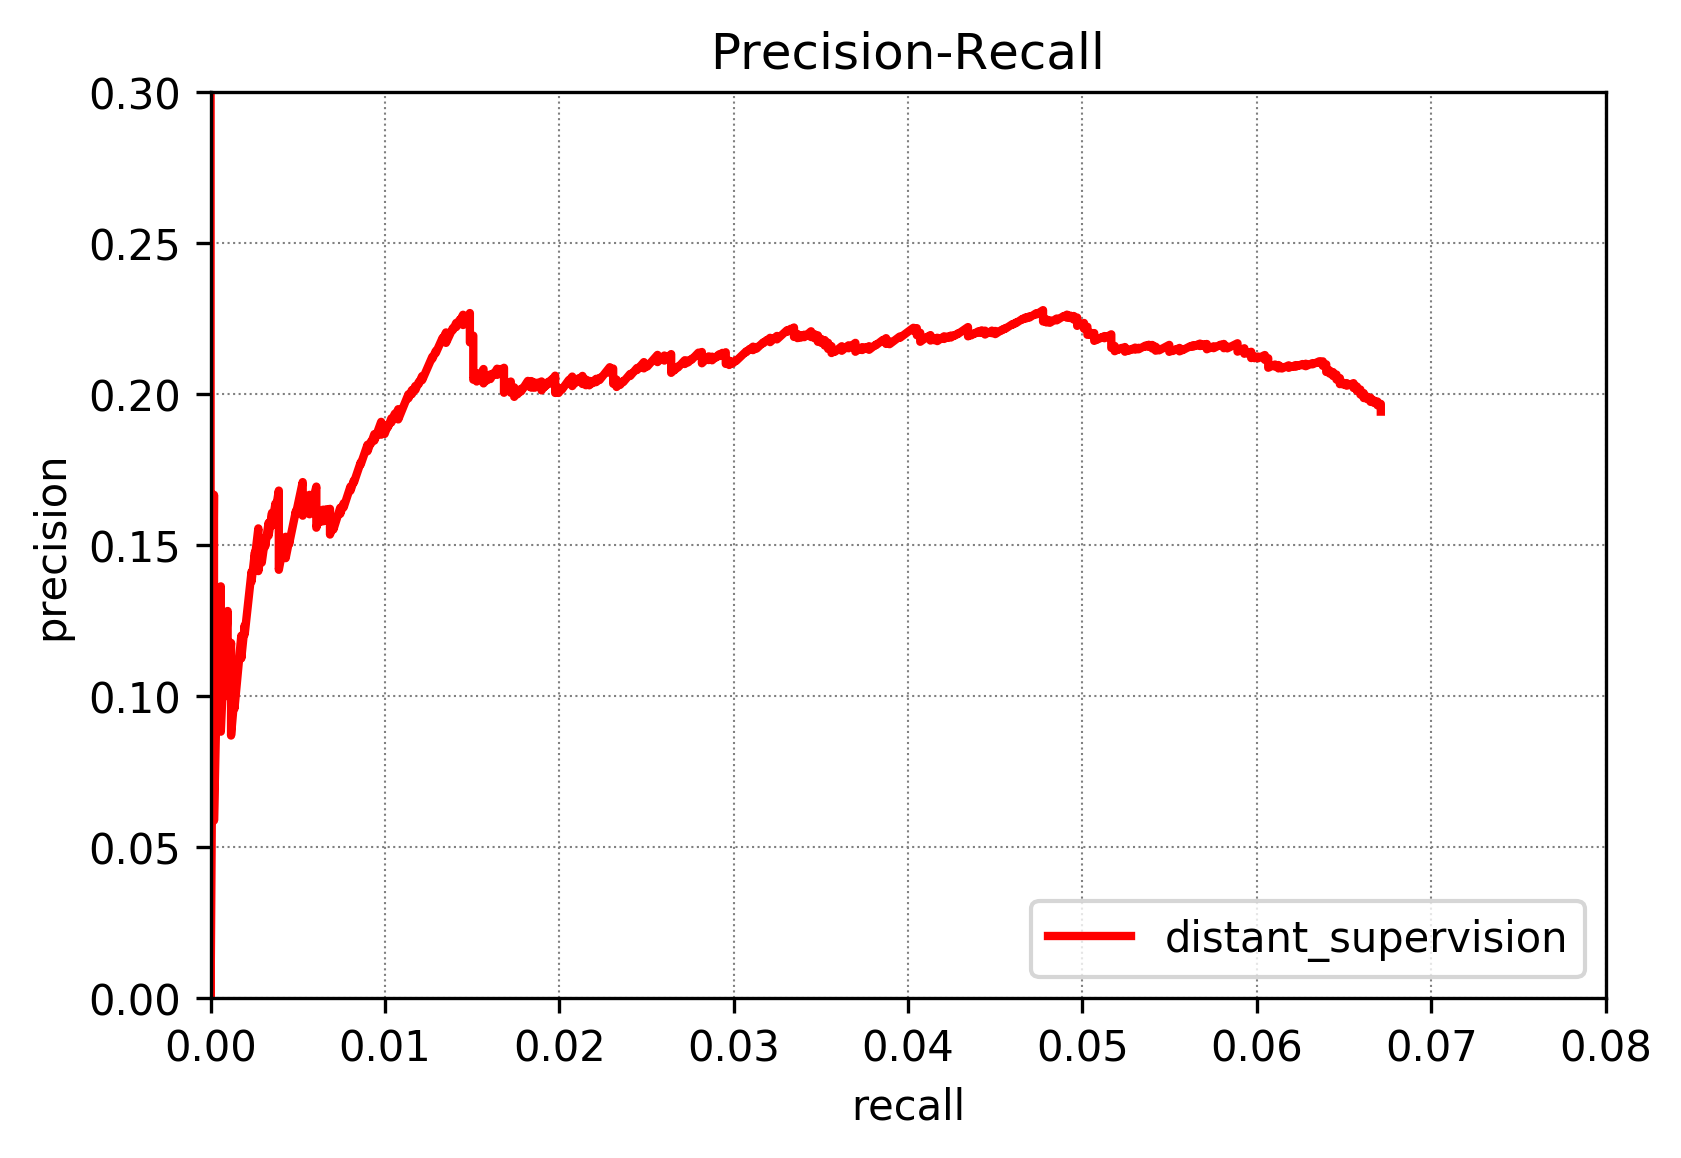

In [113]:
import matplotlib.pyplot as plt
import numpy 

def F1(data):
    F1s = []
    batches = []
    batch = 1
    while True:
        line = data.readline()
        if not line: break
        F1s.append(float(line.strip()))
        batches.append(batch)
        batch *= 2
    return F1s, batches
        
def PR(data):
    precision = []
    x = numpy.arange(0, 1, 0.05)
    y = numpy.power(x, 2)

    recall = []
    while True:
        line = data.readline()
        if not line: break
 
        p, r = line.split(' ')
        precision.append(p)
        recall.append(r) 
        
    return precision, recall

# 171012 Exo
result0 = open("./results_exo/none_r_10/batches_8925/test_pr_0.txt")
# result0 = open("./results_sem_eval_old/adagrad/without_pre_train/C_none_e_13_s_False_u_100_10_b_50_w_3_c_tanh_d_300_i_data_sem_eval_n_0_batches_133/test_pr_4.txt")
# result1 = open("results_sem_eval/adagrad_lr_005_mode_0_l2_6_neg_30_win_2_words_update/C_none_e_13_s_False_u_100_10_b_50_w_3_c_tanh_d_300_i_data_sem_eval_n_0_pretrain_batches_133/test_pr_3.txt")

p0, r0 = PR(result0)
# p1, r1 = PR(result1)
# p2, r2 = PR(result2)
# p3, r3 = PR(result3)

import matplotlib.pyplot as plt
import numpy as np
# Plot Precision-Recall curve
plt.clf()
plt.figure(dpi=300)

# 171012 Exo
plt.plot(r0, p0, lw=2, color='red', ls='-', label='distant_supervision')
# plt.plot(r1, p1, lw=2, color='red', ls='-.', label='with_pretrain')

plt.xlabel('recall')
plt.ylabel('precision')
# plt.ylim([0.8, 1.0])   # sem_eval
# plt.xlim([0.0, 0.8])
plt.ylim([0.0, 0.3]) # nyt_dsk
plt.xlim([0.0, 0.08]) # nyt_ds
plt.title('Precision-Recall')
plt.grid(color='grey', lw=0.5, linestyle='dotted')
plt.legend(loc="lower right")
plt.show()
